# Processing

Import library package yang diperlukan

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

Mendefiniskan nama kolom dalam dataKluster agar memudahkan dalam proses pengkodean selanjutnya

In [33]:
class ColumnData:
    date = 'Date'
    province = 'Province'
    island = 'Island'
    cases = 'Total Cases'
    deaths = 'Total Deaths'
    recovered = 'Total Recovered'
    actives_cases = 'Total Active Cases'
    population = 'Population'
    area = 'Area (km2)'
    mortality = 'Mortality'
    density = 'Population Density'

Mendefinisikan create bins untuk splitting & binning data

In [34]:
def create_bins(df, columns, q=5):
    for column in columns:
        df[column] = pd.qcut(df[column], q, duplicates='drop').cat.codes

Mendefinisikan normalize_data untuk normalizing data

In [35]:
def normalize_data(df, columns):
    minMaxScaler = MinMaxScaler()
    df[columns] = minMaxScaler.fit_transform(d[columns])

Membaca dan menampilkan 5 data

In [36]:
data = pd.read_csv('covid_19_indonesia_time_series_all.csv')

data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,489,20,39,...,106.836118,-6.204699,0.18,45.09,0.0,1.84,4.09%,7.98%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,491,20,39,...,106.836118,-6.204699,0.18,45.27,0.0,1.84,4.07%,7.94%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-JB,Jawa Barat,3,0,0,3,12,5,5,...,107.603708,-6.920432,0.07,0.27,0.0,0.11,41.67%,41.67%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,493,20,39,...,106.836118,-6.204699,0.18,45.45,0.0,1.84,4.06%,7.91%,1.0,1.0


Memilih kolom yang akan digunakan

In [37]:
data = data[[
    ColumnData.date,
    ColumnData.province,
    ColumnData.island,
    ColumnData.cases,
    ColumnData.deaths,
    ColumnData.recovered,
    ColumnData.actives_cases,
    ColumnData.population,
    ColumnData.area,
    ColumnData.density
]]

Menghapus jika ada data yang kosong

In [38]:
data = data.dropna(axis=0, how="any")

Membuat format data pada tanggal menjadi date.

In [39]:
data[ColumnData.date] = pd.to_datetime(data.Date, infer_datetime_format=True).dt.date

Membuat kolom baru yaitu ‘Mortality’ 

In [40]:
data[ColumnData.mortality] = data[ColumnData.deaths] / data[ColumnData.cases]

# Visualisasi

Jumlah kasus dan kematian dalam kurun waktu, Klusteriap data dibagi jika jumlah kasus melebihi 100.


In [41]:
dfl = data[
    [ColumnData.date, ColumnData.cases, ColumnData.deaths, ColumnData.recovered]
].groupby(ColumnData.date).sum().reset_index()

dfl = dfl[(dfl[ColumnData.cases] >= 100)].melt(id_vars=ColumnData.date,
                                               value_vars=[ColumnData.cases, ColumnData.deaths, ColumnData.recovered])

Visualisasi jumlah perkembangan kasus dengan line plot

In [42]:
vis_lp = px.line(dfl, x=ColumnData.date, y='value', color='variable')
vis_lp.update_layout(title='COVID-19 in Indonesia: total number of cases over time',
                     xaxis_title='Indonesia', yaxis_title='Number of cases',
                     legend=dict(x=0.02, y=0.98))
vis_lp.show()

> Pada visualisasi digambarkan kasus COVID-19 di Indonesia pada bulan Maret 2020 hingga Oktober 2020 mengalami peningkatan secara signifikan. Rata-rata kasus baru Klusteriap harinya sebanyak 1.713 kasus. Jumlah kasus COVID-19 hingga 11 Oktober 2020 tercatat sebanyak 333.449 kasus dengan jumlah pasien sembuh sebanyak 255.027 orang dan jumlah pasien yang meninggal sebanyak 11.844 orang.

Visualisasi line plot 5 provinsi dengan jumlah kasus dan kematian tertinggi

In [43]:
pd.options.mode.chained_assignment = None
limit = 5
group = data.groupby(ColumnData.province)
t = group.tail(1).sort_values(ColumnData.cases, ascending=False).set_index(ColumnData.province).drop(
    columns=[ColumnData.date])

s = data[(data[ColumnData.province].isin([i for i in t.index[:limit]]))]
s = s[(s[ColumnData.cases] >= 100)]

# vis_lp = visualization line plot
vis_lp2 = px.line(s, x=ColumnData.date, y=ColumnData.cases, color=ColumnData.province)
vis_lp2.update_layout(title='COVID-19 in Indonesia: total number of cases over time',
                      xaxis_title=ColumnData.date, yaxis_title='Number of cases',
                      legend_title='<b>Top %s provinces</b>' % limit,
                      legend=dict(x=0.02, y=0.98))
vis_lp2.show()

> Pada visualisasi data 5 provinsi dengan jumlah kasus terkonfirmasi paling tinggi dari waktu ke waktu. Hingga 11 Oktober 2020 tercatat bahwa kasus terbanyak terjadi pada provinsi DKI jakarta yakni sebanyak 86.963 kasus. Disusul provinsi Jawa Timur sebanyak 46.984 kasus, provinsi Jawa Barat sebanyak 27.236 kasus, provinsi Jawa Tengah sebanyak 26.401 kasus, dan di posisi kelima adalah provinsi Sulawesi Selatan sebanyak 16.738 kasus. 

Visualisasi menggunakan heatmap untuk menunjukkan perkembangan dari penyebaran covid dalam beberapa minggu terakhir

In [44]:
heatmap = data[(data[ColumnData.cases] >= 100)].sort_values([ColumnData.date, ColumnData.province])
vis_hmap = go.Figure(data=go.Heatmap(
    z=heatmap[ColumnData.cases],
    x=heatmap[ColumnData.date],
    y=heatmap[ColumnData.province],
    colorscale='Viridis'))

vis_hmap.update_layout(
    title='COVID-19 in Indonesia: number of cases over time', xaxis_nticks=45)

vis_hmap.show()

> Pada visualisasi diatas merupakan peta sebaran COVID-19 pada 34 provinsi di Indonesia menggunakan visualisasi heatmap yang menunjukkan tingkat keparahan atau tingginya kasus perhari nya dengan menunjukkan perubahan warna. Dalan visualisasi ini didapatkan DKI Jakarta memiliki perubahan warna yang signifikan yang menandakan DKI Jakarta mendapati tingkat kasus yang lebih banyak.

Menggunakan korelasi matriks

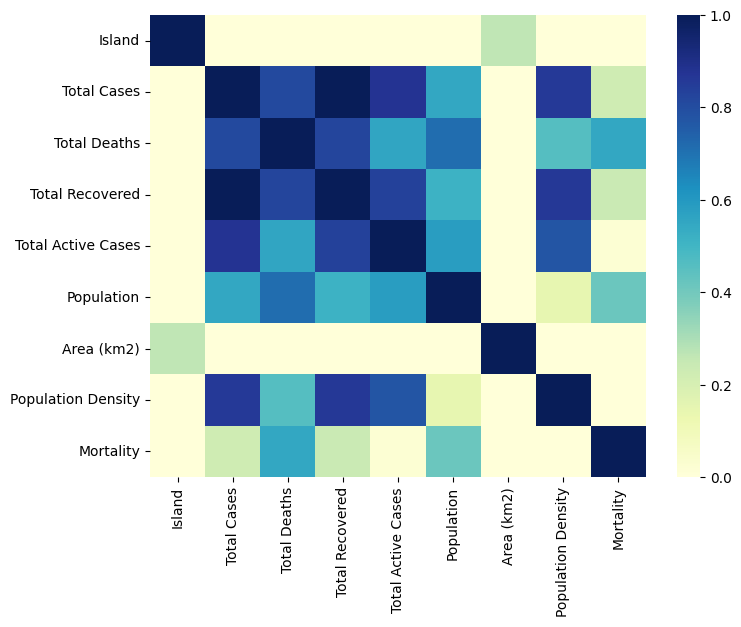

In [45]:
t.replace({'Jawa': 0, 'Sulawesi': 1, 'Kalimantan': 2, 'Sumatera': 3, 'Maluku': 4, 'Papua': 5, 'Nusa Tenggara': 6},
          inplace=True)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(t.corr(), vmin=0, cmap='YlGnBu')
plt.show()

Dari hasil visualisasi korelasi matriks didapatkan korelasi antar fitur. Berdasarkan eksplorasi data yang telah diolah maka kami dapat melihat korelasi yang mendekati 0 dengan jumlah kasus yaitu fitur berikut : 
1. Population Density
2. Mortality

fitur-fitur ini yang akan digunakan untuk pengolahan data selanjutnya.

Splitting data kluster dengan memilih fitur yang akan digunakan yaitu 'Total Cases', 'Population Density', 'Mortality'

In [46]:
#Pilih fitur yang akan digunakan untuk clustering yaitu 'Total Cases', 'Population Density', 'Mortality'
features = [ColumnData.cases, ColumnData.density, ColumnData.mortality]
print('Selected features:', features)

d = t[features].copy()
d.head()

Selected features: ['Total Cases', 'Population Density', 'Mortality']


,Total Cases,Population Density,Mortality
Province,,,
DKI Jakarta,86963,16334.31,0.021722
Jawa Timur,46984,846.78,0.072897
Jawa Barat,27236,1276.55,0.019460
Jawa Tengah,26401,1108.64,0.057081
Sulawesi Selatan,16738,201.78,0.025929


Dari fitur yang dipilih akan dilakukan binning menjadi 7 bagian dan selanjutnya dilakukan normalisasi data sehingga mengurangi adanya outliers dan data lebih mudah dipahami dengan jarak antara 0-1

In [47]:
create_bins(d, [
    ColumnData.cases,
    ColumnData.mortality,
    ColumnData.density
], q=7)

normalize_data(d, d.columns)
d.head()

,Total Cases,Population Density,Mortality
Province,,,
DKI Jakarta,1.0,1.000000,0.333333
Jawa Timur,1.0,0.833333,1.000000
Jawa Barat,1.0,1.000000,0.166667
Jawa Tengah,1.0,1.000000,1.000000
Sulawesi Selatan,1.0,0.666667,0.500000


# Modelling, Pengujian Data dan Analisis Data

In [48]:
#selecting features  
X = d[['Total Cases', 'Population Density', 'Mortality']]

Menggunakan WCSS dengan Metode Elbow Graph untuk menentukan nilai cluster(k)

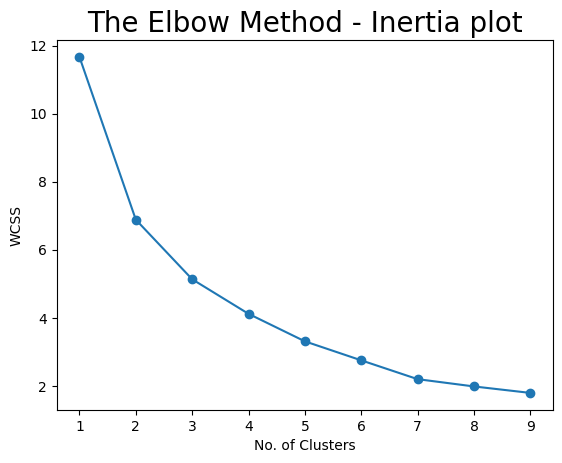

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Elbow Method - Inertia plot
inertia = []
#looping the inertia calculation for each k
for k in range(1, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = k, random_state = 24)
    #Fit cluster_model to X
    cluster_model.fit(X)
    #Get the inertia value
    inertia_value = cluster_model.inertia_
    #Append the inertia_value to inertia list
    inertia.append(inertia_value)
##Inertia plot
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method - Inertia plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3376713272879064
For n_clusters = 3 The average silhouette_score is : 0.30915630801463306
For n_clusters = 4 The average silhouette_score is : 0.3022252531955356
For n_clusters = 5 The average silhouette_score is : 0.2849929169182205
For n_clusters = 6 The average silhouette_score is : 0.3156623794215255
For n_clusters = 7 The average silhouette_score is : 0.298485401415345
For n_clusters = 8 The average silhouette_score is : 0.2748033571909288
For n_clusters = 9 The average silhouette_score is : 0.3014329246247181


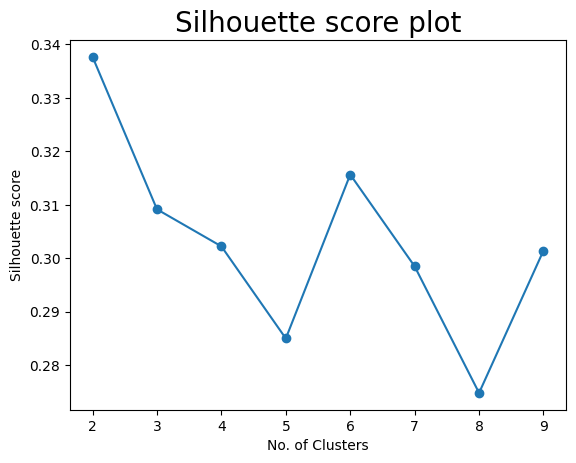

In [50]:
#silhouette score
from sklearn.metrics import silhouette_score

#Silhouette score plot
silhouette = []
#looping the silhouette score calculation for each k
for k in range(2, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = k, random_state = 24)
    #Fit cluster_model to X
    cluster_model.fit(X)
    #Get the silhouette score
    silhouette_avg = silhouette_score(X, cluster_model.labels_)
    #Append the silhouette_avg to silhouette list
    silhouette.append(silhouette_avg)

    #Print the silhouette score
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)

##Silhouette score plot
plt.plot(range(2, 10), silhouette, marker='o')
plt.title('Silhouette score plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette score')
plt.show()

> Pada visualisasi Elbow Method di atas terlihat cluster 7 mendekati bentuk siku-siku. Namun kurang terlihat begitu jelas, untuk pengujian ini dapat menggunakan silhouette score k=6 (selain k=2) memiliki nilai paling tinggi sehingga kami menggunakan k = 6 serta dapat memberikan lebih banyak informasi.

K-means Clustering dengan k=6

In [51]:
kmeans = KMeans(n_clusters=6)
pred = kmeans.fit_predict(d[d.columns])
t['K-means'], d['K-means'] = [pred, pred]
d[d.columns].sort_values(['K-means', ColumnData.mortality, ColumnData.cases, ColumnData.density], ascending=False).style.background_gradient(
    cmap='YlGnBu', low=0, high=0.2)

,Total Cases,Population Density,Mortality,K-means
Province,,,,
Sumatera Selatan,0.666667,0.333333,1.000000,5
Kalimantan Selatan,0.833333,0.500000,0.833333,5
Kalimantan Timur,0.833333,0.000000,0.833333,5
Aceh,0.666667,0.333333,0.666667,5
Kalimantan Tengah,0.500000,0.000000,0.666667,5
Bali,0.833333,0.833333,0.666667,4
Sulawesi Selatan,1.000000,0.666667,0.500000,4
Banten,0.666667,1.000000,0.500000,4
DKI Jakarta,1.000000,1.000000,0.333333,4


Visualisasi dengan Treemap hasil Klasterisasi Provinsi

In [52]:
vis_tmap = px.treemap(t.reset_index(), path=['K-means', ColumnData.province], values=ColumnData.cases)
vis_tmap.update_layout(title='K-means clusters')
vis_tmap.show()

In [53]:
vis_tmap = px.treemap(t.reset_index(), path=['K-means', ColumnData.province], values=ColumnData.mortality)
vis_tmap.update_layout(title='K-means clusters')
vis_tmap.show()

Visualisasi Jumlah kasus aktif dari tiap provinsi dari masing-masing cluster menggunakan bar chart

In [54]:
c = t.sort_values(['K-means', ColumnData.cases], ascending=False)
data = [go.Bar(x=c[(c['K-means'] == i)].index, y=c[(c['K-means'] == i)][ColumnData.cases],
               text=c[(c['K-means'] == i)][ColumnData.cases], name=i) for i in range(0, 6)]

vis_bar = go.Figure(data=data)
vis_bar.update_layout(title='K-means Clustering: number of cases by cluster',
                      xaxis_title='Indonesia State', yaxis_title='Deaths per case')
vis_bar.show()

Visualisasi Jumlah kemungkinan Density dari tiap provinsi dari masing-masing cluster.

In [55]:
# visualization using bar chart
# visualization density rate by clusters
c = t.sort_values(['K-means', ColumnData.density], ascending=False)
data = [go.Bar(x=c[(c['K-means'] == i)].index, y=c[(c['K-means'] == i)][ColumnData.density],
                text=c[(c['K-means'] == i)][ColumnData.density], name=i) for i in range(0, 6)]

vis_bar3 = go.Figure(data=data)
vis_bar3.update_layout(title='K-means Clustering: population density by cluster',
                          xaxis_title='Indonesian states', yaxis_title='Population density')
vis_bar3.show()


Visualisasi Jumlah kemungkinan Kematian	 dari tiap provinsi dari masing-masing cluster.

In [56]:
# visualization using bar chart
# visualization mortality rate by clusters
c = t.sort_values(['K-means', ColumnData.mortality], ascending=False)
data = [go.Bar(x=c[(c['K-means'] == i)].index, y=c[(c['K-means'] == i)][ColumnData.mortality],
               text=c[(c['K-means'] == i)][ColumnData.mortality], name=i) for i in range(0, 6)]
data.append(
    go.Scatter(
        x=t.sort_values(ColumnData.mortality, ascending=False).index,
        y=np.full((1, len(t.index)), 0.03).tolist()[0],
        marker_color='black',
        name='Indonesian avg'
    )
)

vis_bar2 = go.Figure(data=data)
vis_bar2.update_layout(title='K-means Clustering: mortality rate by cluster',
                       xaxis_title='Indonesian states', yaxis_title='Deaths per case')
vis_bar2.show()


In [57]:
# Average number of cases per cluster
t.groupby('K-means')[ColumnData.cases].mean()

K-means
0     1153.333333
1     2050.800000
2    18610.800000
3     2418.111111
4    23820.714286
5     7634.600000
Name: Total Cases, dtype: float64

In [58]:
# Average population density per cluster
t.groupby('K-means')[ColumnData.density].mean()

K-means
0      63.020000
1     374.558000
2     526.636000
3      47.267778
4    2836.125714
5      65.672000
Name: Population Density, dtype: float64

In [59]:
# Average mortality rate per cluster
t.groupby('K-means')[ColumnData.mortality].mean()

K-means
0    0.040321
1    0.024968
2    0.053400
3    0.013360
4    0.024309
5    0.041137
Name: Mortality, dtype: float64

In [60]:
# Piclke the model
import pickle
pickle.dump(kmeans, open('kmeans.pkl', 'wb'))

In [61]:
# data after kmeans to csv
t.to_csv('data.csv')